<a href="https://colab.research.google.com/github/BWBit/L/blob/main/revisaobndes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, Normalizer
import pandas as pd
import numpy as np

# Criando um DataFrame de exemplo
data = {'idade': [20, 30, 40, 50], 'salario': [5000, 10000, 15000, 20000]}
df = pd.DataFrame(data)

# Criando os objetos de escalonamento
minmax_scaler = MinMaxScaler()
scaler = StandardScaler()
robust_scaler = RobustScaler()
normalizer = Normalizer()

# Aplicando as transformações
df_minmax = pd.DataFrame(minmax_scaler.fit_transform(df), columns=df.columns)
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df_robust = pd.DataFrame(robust_scaler.fit_transform(df), columns=df.columns)
df_normalized = pd.DataFrame(normalizer.fit_transform(df), columns=df.columns)

print("MinMaxScaler")
print(df_minmax)
print("StanderScaler")
print(df_scaled)
print("RobustScaler")
print(df_robust)
print("Normalizer")
print(df_normalized)

MinMaxScaler
      idade   salario
0  0.000000  0.000000
1  0.333333  0.333333
2  0.666667  0.666667
3  1.000000  1.000000
StanderScaler
      idade   salario
0 -1.341641 -1.341641
1 -0.447214 -0.447214
2  0.447214  0.447214
3  1.341641  1.341641
RobustScaler
      idade   salario
0 -1.000000 -1.000000
1 -0.333333 -0.333333
2  0.333333  0.333333
3  1.000000  1.000000
Normalizer
      idade   salario
0  0.004000  0.999992
1  0.003000  0.999996
2  0.002667  0.999996
3  0.002500  0.999997


In [ ]:
from sklearn.preprocessing import Normalizer
import numpy as np

# Dados de exemplo
X = np.array([[1, 2], [3, 4], [5, 6]])

# Normalização L2
transformer = Normalizer().fit(X)
X_normalized = transformer.transform(X)

print(X_normalized)

[[0.4472136  0.89442719]
 [0.6        0.8       ]
 [0.6401844  0.76822128]]


In [ ]:
from sklearn.preprocessing import Normalizer
import numpy as np

# Dados de exemplo
X = np.array([[1, 2], [3, 4], [5, 6]])

# Normalização L1
transformer = Normalizer(norm='l1').fit(X)
X_normalized = transformer.transform(X)

print(X_normalized)

[[0.33333333 0.66666667]
 [0.42857143 0.57142857]
 [0.45454545 0.54545455]]


In [ ]:
import pandas as pd
from sklearn.preprocessing import KBinsDiscretizer

# Simulando dados de idade
data = {'idade': [20, 21, 21, 22, 25, 30, 35, 40, 45, 50, 55, 60, 65, 67, 68, 69,70]}
df = pd.DataFrame(data)

# Criando um discretizador com 5 bins e estratégia 'quantile'
discretizer = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='kmeans')

# Discretizando a coluna 'idade'
df['faixa_etaria'] = discretizer.fit_transform(df[['idade']])

# Visualizando os resultados
print(df)

    idade  faixa_etaria
0      20           0.0
1      21           0.0
2      21           0.0
3      22           0.0
4      25           0.0
5      30           0.0
6      35           1.0
7      40           1.0
8      45           1.0
9      50           2.0
10     55           2.0
11     60           3.0
12     65           3.0
13     67           3.0
14     68           3.0
15     69           3.0
16     70           3.0


In [ ]:
import pandas as pd
from sklearn.preprocessing import KBinsDiscretizer

# Simulando dados
data = {'idade': [20, 25, 30, 35, 40, 45, 50]}
df = pd.DataFrame(data)

# Discretizando com estratégia 'kmeans' e codificação 'onehot'
discretizer = KBinsDiscretizer(n_bins=3, encode='onehot', strategy='kmeans')
df_encoded = pd.DataFrame(discretizer.fit_transform(df[['idade']]))

# Criando nomes de colunas mais descritivos
column_names = [f'faixa_{i+1}' for i in range(df_encoded.shape[1])]
df_encoded.columns = column_names

print(df_encoded)

         faixa_1
0    (0, 0)\t1.0
1    (0, 0)\t1.0
2    (0, 0)\t1.0
3    (0, 1)\t1.0
4    (0, 1)\t1.0
5    (0, 2)\t1.0
6    (0, 2)\t1.0


In [ ]:
# Exemplos em Python para Codificação de Variáveis Categóricas
# Consideremos um DataFrame com uma coluna categórica "cor" e uma coluna numérica "idade":

import pandas as pd

data = {'cor': ['vermelho', 'azul', 'verde', 'vermelho', 'azul'],
        'idade': [25, 30, 22, 28, 35]}
df = pd.DataFrame(data)
print(df)

        cor  idade
0  vermelho     25
1      azul     30
2     verde     22
3  vermelho     28
4      azul     35


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Criando um objeto LabelEncoder
label_encoder = LabelEncoder()

# Aplicando o LabelEncoder à coluna 'cor'
df['cor_encoded'] = label_encoder.fit_transform(df['cor'])

print(df)

        cor  idade  cor_encoded
0  vermelho     25            2
1      azul     30            0
2     verde     22            1
3  vermelho     28            2
4      azul     35            0


In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Criando um objeto OneHotEncoder
onehot_encoder = OneHotEncoder()

# Aplicando o OneHotEncoder à coluna 'cor'
column_transformer = ColumnTransformer(transformers=[('encoder', onehot_encoder, ['cor'])], remainder='passthrough')
df_encoded = pd.DataFrame(column_transformer.fit_transform(df), columns=column_transformer.get_feature_names_out())

print(df_encoded)

   encoder__cor_azul  encoder__cor_verde  encoder__cor_vermelho  \
0                0.0                 0.0                    1.0   
1                1.0                 0.0                    0.0   
2                0.0                 1.0                    0.0   
3                0.0                 0.0                    1.0   
4                1.0                 0.0                    0.0   

   remainder__idade  remainder__cor_encoded  
0              25.0                     2.0  
1              30.0                     0.0  
2              22.0                     1.0  
3              28.0                     2.0  
4              35.0                     0.0  


In [ ]:
# Assumindo que a ordem das cores é importante (e.g., vermelho < verde < azul)
from sklearn.preprocessing import OrdinalEncoder

# Criando um objeto OrdinalEncoder com a ordem desejada
ordinal_encoder = OrdinalEncoder(categories=[['vermelho', 'verde', 'azul']])

# Aplicando o OrdinalEncoder à coluna 'cor'
df['cor_encoded'] = ordinal_encoder.fit_transform(df[['cor']])

print(df)

        cor  idade  cor_encoded
0  vermelho     25          0.0
1      azul     30          2.0
2     verde     22          1.0
3  vermelho     28          0.0
4      azul     35          2.0


In [ ]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
  # Exemplo de métrica de avaliação

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Definir os hiperparâmetros a serem ajustados
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}

# Criar o modelo base
svc = SVC()

# Criar o objeto GridSearchCV
grid = GridSearchCV(svc, param_grid, cv=5)

# Ajustar o modelo aos dados de treinamento
grid.fit(X_train, y_train)

# Melhor conjunto de hiperparâmetros
print("Melhores hiperparâmetros:", grid.best_params_)

# Avaliar o modelo no conjunto de teste
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia no conjunto de teste:", accuracy)

# Fazer previsões em novos dados
new_data = ...  # Substitua por seus novos dados
predictions = best_model.predict(new_data)
print("Previsões:", predictions)

NameError: name 'y' is not defined

In [ ]:
#Exemplo de Auto ML
!pip install tpot

In [ ]:
from tpot import TPOTClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

# Carregar o dataset Iris
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)

# Inicializar TPOT
tpot = TPOTClassifier(generations=5, population_size=20, verbosity=2, random_state=42)

# Treinar o modelo
tpot.fit(X_train, y_train)

# Avaliar o modelo
print(tpot.score(X_test, y_test))

# Exportar o pipeline ótimo gerado
tpot.export('best_pipeline.py')

Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.9833333333333334

Generation 2 - Current best internal CV score: 0.9833333333333334

Generation 3 - Current best internal CV score: 0.9833333333333334

Generation 4 - Current best internal CV score: 0.9833333333333334

Generation 5 - Current best internal CV score: 0.9833333333333334

Best pipeline: LogisticRegression(MultinomialNB(input_matrix, alpha=10.0, fit_prior=False), C=25.0, dual=False, penalty=l2)
1.0


In [ ]:
pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 362.8/362.8 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.2/233.2 kB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 6.1 MB/s eta 0:00:00


In [ ]:
import optuna
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Carregar o dataset Breast Cancer
data = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=42)

# Definir a função objetivo
def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 10, 100)
    max_depth = trial.suggest_int('max_depth', 1, 32, log=True)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 16)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 16)

    # Modelo RandomForest com parâmetros sugeridos pelo Optuna
    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf
    )

    # Avaliar o modelo usando cross-validation
    return cross_val_score(model, X_train, y_train, cv=3).mean()

# Executar a otimização com Optuna
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

# Mostrar os melhores hiperparâmetros encontrados
print('Melhores parâmetros:', study.best_params)

# Avaliar o modelo com os melhores parâmetros no conjunto de teste
best_model = RandomForestClassifier(**study.best_params)
best_model.fit(X_train, y_train)
print('Acurácia no conjunto de teste:', best_model.score(X_test, y_test))

[I 2024-10-08 21:42:45,006] A new study created in memory with name: no-name-b52d6cdd-463f-4081-804c-02c0fb1311a4
[I 2024-10-08 21:42:45,135] Trial 0 finished with value: 0.9186708493087021 and parameters: {'n_estimators': 20, 'max_depth': 31, 'min_samples_split': 6, 'min_samples_leaf': 15}. Best is trial 0 with value: 0.9186708493087021.
[I 2024-10-08 21:42:45,284] Trial 1 finished with value: 0.9384657836644591 and parameters: {'n_estimators': 22, 'max_depth': 8, 'min_samples_split': 9, 'min_samples_leaf': 3}. Best is trial 1 with value: 0.9384657836644591.
[I 2024-10-08 21:42:45,607] Trial 2 finished with value: 0.9032037876147322 and parameters: {'n_estimators': 64, 'max_depth': 1, 'min_samples_split': 7, 'min_samples_leaf': 13}. Best is trial 1 with value: 0.9384657836644591.
[I 2024-10-08 21:42:45,787] Trial 3 finished with value: 0.9428081793888695 and parameters: {'n_estimators': 31, 'max_depth': 22, 'min_samples_split': 4, 'min_samples_leaf': 11}. Best is trial 3 with value: 0

Melhores parâmetros: {'n_estimators': 18, 'max_depth': 12, 'min_samples_split': 4, 'min_samples_leaf': 3}
Acurácia no conjunto de teste: 0.9649122807017544


In [ ]:
from scipy.optimize import dual_annealing
import numpy as np

# Função objetivo
def objective(x):
    return np.sin(x[0]) + np.cos(x[1])

# Limites para x e y
bounds = [(-10, 10), (-10, 10)]

# Executar o Simulated Annealing
result = dual_annealing(objective, bounds)

print(f"Melhor valor encontrado: {result.fun}")
print(f"Parâmetros ótimos: {result.x}")

Melhor valor encontrado: -1.9999999999995426
Parâmetros ótimos: [-7.85398068  3.14159256]


In [ ]:
pip install deap


In [ ]:
import random
from deap import base, creator, tools, algorithms

# Criar classe para o problema de maximização
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

# Função de avaliação
def eval_func(individual):
    x, y = individual
    return x ** 2 + y ** 2,  # Maximizar

# Inicialização do indivíduo e população
toolbox = base.Toolbox()
toolbox.register("attr_float", random.uniform, -10, 10)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, n=2)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Operadores genéticos
toolbox.register("mate", tools.cxBlend, alpha=0.5)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=1, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("evaluate", eval_func)

# Algoritmo Genético
population = toolbox.population(n=100)

# Executar o algoritmo
algorithms.eaSimple(population, toolbox, cxpb=0.7, mutpb=0.2, ngen=40, verbose=False)

# Melhor indivíduo
best_ind = tools.selBest(population, 1)[0]
print(f"Melhor indivíduo: {best_ind}")
print(f"Fitness: {best_ind.fitness.values[0]}")

Melhor indivíduo: [-6083570.05657746, 10.590274447274258]
Fitness: 37009824633398.03


In [ ]:
pip install pyswarm

  Preparing metadata (setup.py) ... done
  Created wheel for pyswarm: filename=pyswarm-0.6-py3-none-any.whl size=4464 sha256=013856991c2c8d3dc26bbe31141509ed8ee970b815af5e58fddc91de8f09b44f
  Stored in directory: /root/.cache/pip/wheels/71/67/40/62fa158f497f942277cbab8199b05cb61c571ab324e67ad0d6
Successfully built pyswarm


In [ ]:
from pyswarm import pso
import numpy as np

# Função objetivo
def objective(x):
    return x[0] ** 2 + x[1] ** 2  # Minimizar

# Limites para x e y
lb = [-10, -10]
ub = [10, 10]

# Executar PSO
best_position, best_value = pso(objective, lb, ub)

print(f"Melhor valor encontrado: {best_value}")
print(f"Parâmetros ótimos: {best_position}")

Stopping search: Swarm best objective change less than 1e-08
Melhor valor encontrado: 4.354182510840312e-09
Parâmetros ótimos: [-5.73907353e-05  3.25651043e-05]


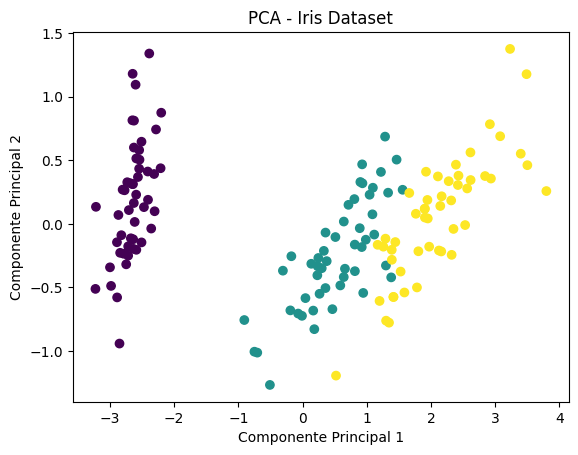

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris

# Carregar o conjunto de dados Iris
data = load_iris()
X = data.data

# Aplicar PCA
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

# Plotar resultados
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=data.target)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('PCA - Iris Dataset')
plt.show()

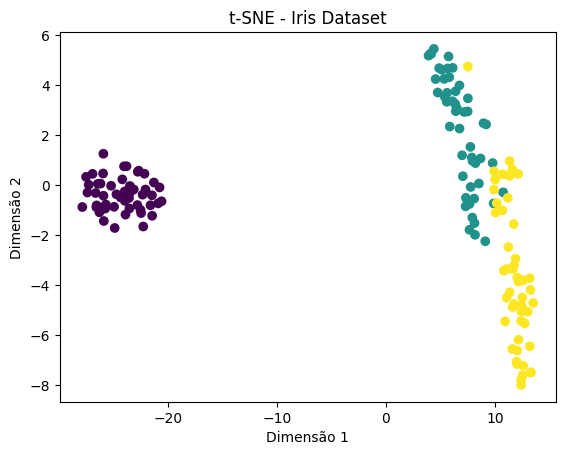

In [ ]:
from sklearn.manifold import TSNE

# Aplicar t-SNE
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)

# Plotar resultados
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=data.target)
plt.xlabel('Dimensão 1')
plt.ylabel('Dimensão 2')
plt.title('t-SNE - Iris Dataset')
plt.show()

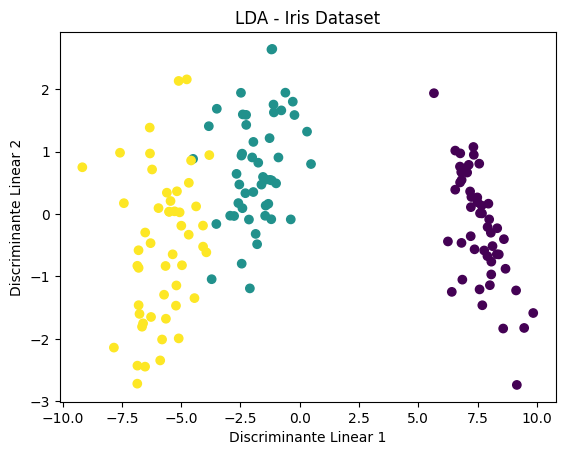

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Aplicar LDA
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(X, data.target)

# Plotar resultados
plt.scatter(X_lda[:, 0], X_lda[:, 1], c=data.target)
plt.xlabel('Discriminante Linear 1')
plt.ylabel('Discriminante Linear 2')
plt.title('LDA - Iris Dataset')
plt.show()

In [ ]:
from keras.layers import Input, Dense
from keras.models import Model

# Definindo a estrutura do Autoencoder
input_dim = X.shape[1]
encoding_dim = 2  # Dimensão desejada

input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_layer)
decoded = Dense(input_dim, activation='sigmoid')(encoded)

autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

# Treinar o Autoencoder
autoencoder.fit(X, X, epochs=50, batch_size=16, shuffle=True)

# Obter a representação reduzida
encoder = Model(input_layer, encoded)
X_autoencoded = encoder.predict(X)

# Plotar resultados
plt.scatter(X_autoencoded[:, 0], X_autoencoded[:, 1], c=data.target)
plt.xlabel('Componente Aprendida 1')
plt.ylabel('Componente Aprendida 2')
plt.title('Autoencoder - Iris Dataset')
plt.show()

Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 14.5446  
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13.7609 
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 14.1264 
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13.1791 
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13.8613 
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13.7124 
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13.0717 
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13.1978 
Epoch 9/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12.8470 
Epoch 10/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12.4832 
Epoch 11/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12.3370 
Epoch 12/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12.6042 
Epoch 13/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11.9461 
Epoch 14/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11.3524 
Epoch 15/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - los

1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


AttributeError: 'dict' object has no attribute 'target'

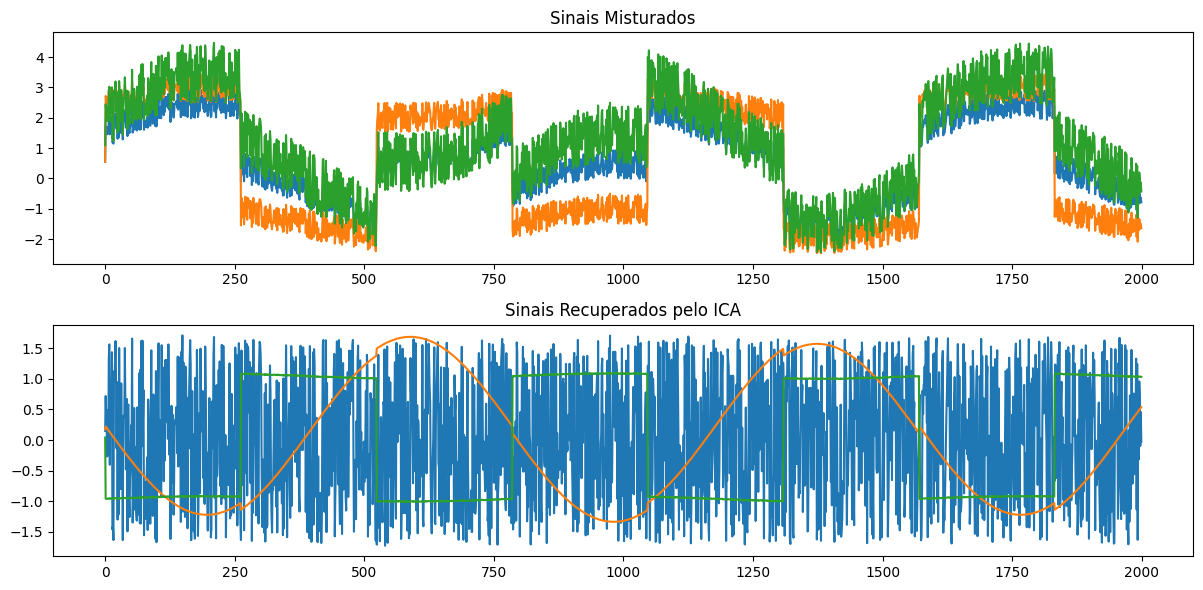

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import FastICA

# Gerar sinais misturados
np.random.seed(0)
n_samples = 2000
time = np.linspace(0, 8, n_samples)

# Sinais independentes
s1 = np.sin(2 * time)  # Sinal 1
s2 = np.sign(np.sin(3 * time))  # Sinal 2
s3 = np.random.rand(n_samples)  # Sinal 3

# Mistura dos sinais
S = np.c_[s1, s2, s3]
A = np.array([[1, 1, 1], [0.5, 2, 1], [1.5, 1, 2]])  # Matriz de mistura
X = S.dot(A.T)  # Sinais misturados

# Aplicar ICA
ica = FastICA(n_components=3)
S_ = ica.fit_transform(X)  # Sinais recuperados
A_ = ica.mixing_  # Matriz de mistura estimada

# Plotar resultados
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.title('Sinais Misturados')
plt.plot(X)
plt.subplot(2, 1, 2)
plt.title('Sinais Recuperados pelo ICA')
plt.plot(S_)
plt.tight_layout()
plt.show()

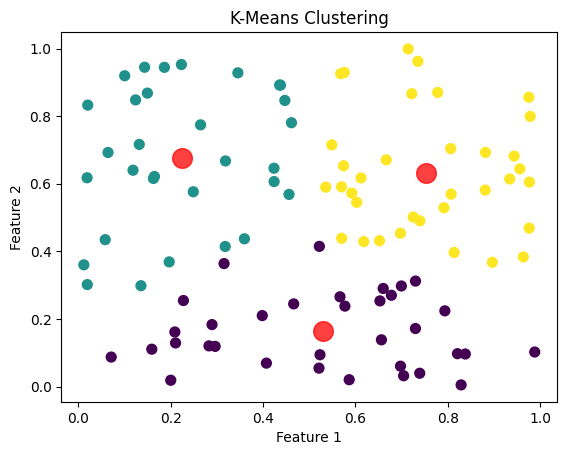

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Gerar dados de exemplo
np.random.seed(0)
X = np.random.rand(100, 2)

# Aplicar K-Means
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# Plotar os resultados
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', s=200, alpha=0.75)
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

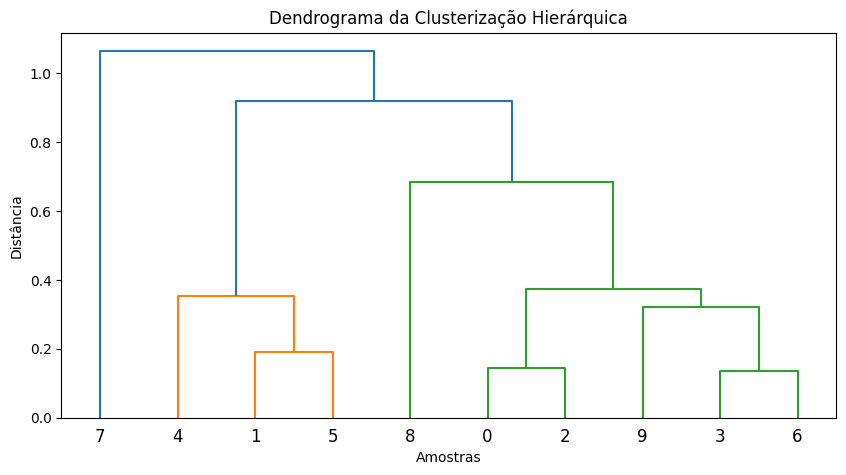

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Gerar dados de exemplo
np.random.seed(0)
X = np.random.rand(10, 2)

# Aplicar clusterização hierárquica
Z = linkage(X, 'ward')

# Plotar o dendrograma
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.title('Dendrograma da Clusterização Hierárquica')
plt.xlabel('Amostras')
plt.ylabel('Distância')
plt.show()

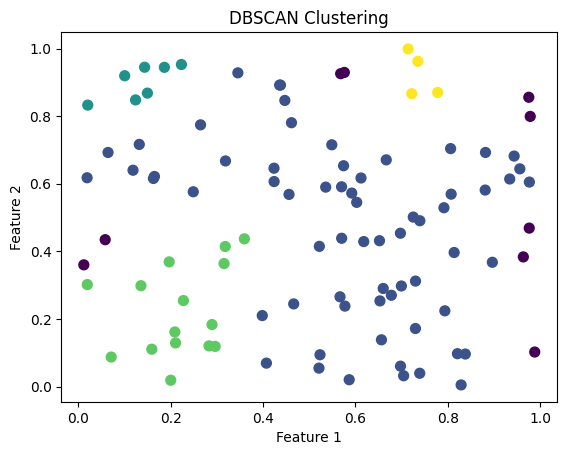

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

# Gerar dados de exemplo
np.random.seed(0)
X = np.random.rand(100, 2)

# Aplicar DBSCAN
dbscan = DBSCAN(eps=0.12, min_samples=4)
y_dbscan = dbscan.fit_predict(X)

# Plotar os resultados
plt.scatter(X[:, 0], X[:, 1], c=y_dbscan, s=50, cmap='viridis')
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

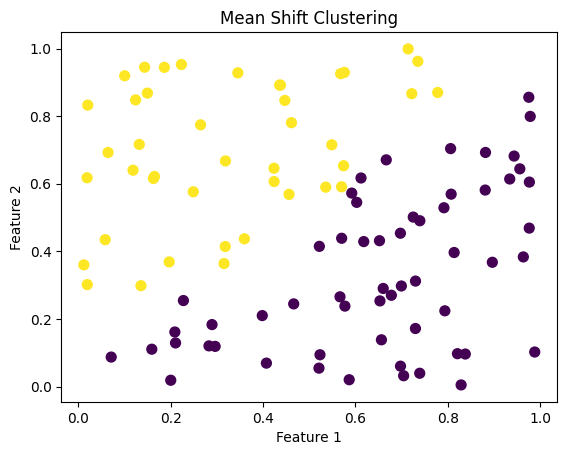

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import MeanShift

# Gerar dados de exemplo
np.random.seed(0)
X = np.random.rand(100, 2)

# Aplicar Mean Shift
mean_shift = MeanShift()
y_mean_shift = mean_shift.fit_predict(X)

# Plotar os resultados
plt.scatter(X[:, 0], X[:, 1], c=y_mean_shift, s=50, cmap='viridis')
plt.title('Mean Shift Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

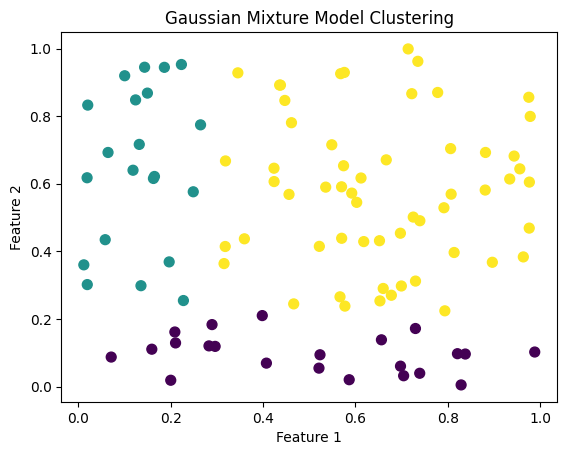

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

# Gerar dados de exemplo
np.random.seed(0)
X = np.random.rand(100, 2)

# Aplicar GMM
gmm = GaussianMixture(n_components=3)
gmm.fit(X)
y_gmm = gmm.predict(X)

# Plotar os resultados
plt.scatter(X[:, 0], X[:, 1], c=y_gmm, s=50, cmap='viridis')
plt.title('Gaussian Mixture Model Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Carregar dados
data = load_iris()
X = data.data
y = data.target

# Dividir em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Criar e treinar o modelo
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Fazer previsões
y_pred = model.predict(X_test)

# Avaliar o modelo
print(f'Acurácia: {accuracy_score(y_test, y_pred)}')

Acurácia: 1.0


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Criar e treinar o modelo KNN
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)

# Fazer previsões
knn_pred = knn_model.predict(X_test)

# Avaliar o modelo
print(f'Acurácia KNN: {accuracy_score(y_test, knn_pred)}')

Acurácia KNN: 0.9666666666666667


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Criar e treinar o modelo de árvore de decisão
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

# Fazer previsões
tree_pred = tree_model.predict(X_test)

# Avaliar o modelo
print(f'Acurácia Árvore de Decisão: {accuracy_score(y_test, tree_pred)}')

Acurácia Árvore de Decisão: 1.0


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Criar e treinar o modelo de Random Forest
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train, y_train)

# Fazer previsões
rf_pred = rf_model.predict(X_test)

# Avaliar o modelo
print(f'Acurácia Random Forest: {accuracy_score(y_test, rf_pred)}')

Acurácia Random Forest: 1.0


In [ ]:
from sklearn.svm import SVC

# Criar e treinar o modelo SVM
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Fazer previsões
svm_pred = svm_model.predict(X_test)

# Avaliar o modelo
print(f'Acurácia SVM: {accuracy_score(y_test, svm_pred)}')

Acurácia SVM: 1.0


In [ ]:
from sklearn.naive_bayes import GaussianNB

# Criar e treinar o modelo Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Fazer previsões
nb_pred = nb_model.predict(X_test)

# Avaliar o modelo
print(f'Acurácia Naive Bayes: {accuracy_score(y_test, nb_pred)}')

Acurácia Naive Bayes: 0.9666666666666667


In [ ]:
from sklearn.metrics import classification_report

# Listar os modelos
models = {
    'Logistic Regression': LogisticRegression(max_iter=200),
    'KNN': KNeighborsClassifier(n_neighbors=3),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(n_estimators=100),
    'SVM': SVC(kernel='linear'),
    'Naive Bayes': GaussianNB()
}

# Treinar e avaliar todos os modelos
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f'{model_name}:\n{classification_report(y_test, y_pred)}')

Logistic Regression:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

KNN:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30

Decision Tree:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00 